In [1]:
import torch
from torch.nn import functional as F

class LinearRegression(torch.nn.Module):
    
    def __init__(self, features):
        super().__init__()
        self.m = torch.nn.parameter.Parameter(data=torch.randn(features), requires_grad=True)
        self.c = torch.nn.parameter.Parameter(data=torch.randn(1), requires_grad=True)
    
    def forward(self,X,targets):
        result = (self.m*X).sum(axis=1) + self.c
        loss = F.mse_loss(result,targets)
        return result, loss

import pandas as pd
import numpy as np
df = pd.read_csv('data.csv')

In [2]:
df = df[df.columns[:-1]]


In [3]:
df.columns


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [4]:

df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
df.isna().sum()


Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [6]:

from sklearn.preprocessing import minmax_scale

x= minmax_scale(np.array(df.iloc[:,:-1]))
x = torch.tensor(x)
y = torch.tensor(np.array(df.iloc[:,-1]))
x,y

(tensor([[0.6868, 0.4420, 0.5015, 0.4644, 0.3299],
         [0.6835, 0.4885, 0.4645, 0.2422, 0.5760],
         [0.4837, 0.4686, 0.7014, 0.6956, 0.5286],
         ...,
         [0.5071, 0.6700, 0.2085, 0.0289, 0.4765],
         [0.5584, 0.4204, 0.5176, 0.7644, 0.6113],
         [0.5307, 0.4870, 0.4727, 0.4600, 0.6671]], dtype=torch.float64),
 tensor([1059033.5579, 1505890.9148, 1058987.9879,  ..., 1030729.5832,
         1198656.8724, 1298950.4803], dtype=torch.float64))

In [7]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

model = LinearRegression(len(x[0]))

optim = torch.optim.SGD(model.parameters(),lr=0.01)

result, loss = model(x_train,y_train)
print(f'Initial Training loss : {loss}')

losses = []
val_losses = []
for epoch in range(200):
    result, loss = model(x_train,y_train)
    r,val = model(x_test,y_test)
    losses.append(float(loss.data))
    val_losses.append(float(val.data))
    optim.zero_grad(set_to_none=True)
    loss.backward()
    optim.step()


Initial Training loss : 1636707751393.9014


Matplotlib is building the font cache; this may take a moment.


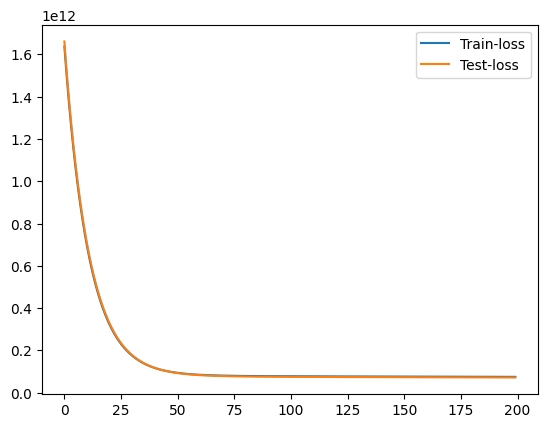

In [8]:

import matplotlib.pyplot as plt

plt.plot(losses, label='Train-loss')
plt.plot(val_losses, label='Test-loss')
plt.legend()